# Introduction
This assignment is divided into 3 parts
- Part 1: The program should analyses the differences between the sexes by age in Ireland.
* Weighted mean age (by sex)
* The difference between the sexes by age

- Part 2: Creat a variable that stores an age (35 years old).
* The code would group the people within 5 years of that age together, into one age group. 
* The program should calculate the population difference between the sexes in that age group.

- Part 3: The would work out which region in Ireland has the biggest population difference between the sexes in that age group

# Part 1 
## 1.1 Preparing the enviroment
This notebook analyses the differences between the sexes by age in Ireland, from the following link: 
"https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en"
- Weighted mean age (by sex).
- The difference between the sexes by age.

In [4]:
import pandas as pd

In [5]:
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en"
df = pd.read_csv(url)
df.tail(3)

,STATISTIC,Statistic Label,TLIST(A1),CensusYear,C02199V02655,Sex,C02076V03371,Single Year of Age,C03789V04537,Administrative Counties,UNIT,VALUE
9789,FY006AC01,Population,2022,2022,2,Female,650,100 years and over,2ae19629-149d-13a3-e055-000000000001,Cavan County Council,Number,12
9790,FY006AC01,Population,2022,2022,2,Female,650,100 years and over,2ae19629-14a4-13a3-e055-000000000001,Donegal County Council,Number,31
9791,FY006AC01,Population,2022,2022,2,Female,650,100 years and over,2ae19629-1495-13a3-e055-000000000001,Monaghan County Council,Number,7


Drop columns that we don't need.

In [6]:
# Check name of columns
header = df.columns.tolist()
print(header)

['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'CensusYear', 'C02199V02655', 'Sex', 'C02076V03371', 'Single Year of Age', 'C03789V04537', 'Administrative Counties', 'UNIT', 'VALUE']


In [7]:
drop_col_list = ['STATISTIC','Statistic Label', 'TLIST(A1)', 'CensusYear','C02199V02655', 'C02076V03371','C03789V04537','UNIT']
df.drop(columns=drop_col_list, inplace=True) # Inplace=True to modify the DataFrame directly
print(df.head(3))  # print the first 3 rows to verify

          Sex Single Year of Age Administrative Counties    VALUE
0  Both sexes           All ages                 Ireland  5149139
1  Both sexes           All ages   Carlow County Council    61968
2  Both sexes           All ages     Dublin City Council   592713


There's data for each gender and we need to get rid of 'Both sexes'

In [8]:
df = df[df["Sex"] != "Both sexes"]
print(df.tail(3))  # print the last 3 rows to verify

         Sex  Single Year of Age  Administrative Counties  VALUE
9789  Female  100 years and over     Cavan County Council     12
9790  Female  100 years and over   Donegal County Council     31
9791  Female  100 years and over  Monaghan County Council      7


Having words in the age field, such as "All ages," "under 1 year," "years and over," and "years," can be problematic when analyzing the data. Therefore, we will remove these words and keep only the age as a number.

First step is remove the "All ages" text.

In [9]:
df = df[df["Single Year of Age"] != "All ages"]
print(df.head(3))  # print the first 3 rows to verify

       Sex Single Year of Age Administrative Counties  VALUE
3296  Male       Under 1 year                 Ireland  29610
3297  Male       Under 1 year   Carlow County Council    346
3298  Male       Under 1 year     Dublin City Council   3188


Second step is change the column using find and replace. We will replace everything that says "Under 1 year" for "0" consider the minors have less than 1 year.

In [10]:
df["Single Year of Age"] = df["Single Year of Age"].replace("Under 1 year", "0")
print(df.head(5))  # print the first 5 rows to verify

       Sex Single Year of Age                Administrative Counties  VALUE
3296  Male                  0                                Ireland  29610
3297  Male                  0                  Carlow County Council    346
3298  Male                  0                    Dublin City Council   3188
3299  Male                  0  Dún Laoghaire Rathdown County Council   1269
3300  Male                  0                  Fingal County Council   2059


Third step is change the text that is repeated regulary in the data set "years". To avoid do this one by one: '2 years' '3 years', we can use regular expressions, that they help to change/delete large amounts of data that are repeated in the data set.

Source: https://www.w3schools.com/python/python_regex.asp

In [11]:
# Regular expression to remove 'years' and 'year' from the 'Single Year of Age' column
df["Single Year of Age"] = df["Single Year of Age"].str.replace(r'\D', '', regex=True) # add r to indicate raw string
print(df.tail(5))  # print the last 5 rows to verify

         Sex Single Year of Age   Administrative Counties  VALUE
9787  Female                100  Roscommon County Council      7
9788  Female                100      Sligo County Council      9
9789  Female                100      Cavan County Council     12
9790  Female                100    Donegal County Council     31
9791  Female                100   Monaghan County Council      7


In [12]:
#Create a new CSV file with the cleaned data
df.to_csv("population_for_analysis.csv")

In [13]:
print(df.info())  # print DataFrame info to verify data types

<class 'pandas.core.frame.DataFrame'>
Index: 6464 entries, 3296 to 9791
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sex                      6464 non-null   object
 1   Single Year of Age       6464 non-null   object
 2   Administrative Counties  6464 non-null   object
 3   VALUE                    6464 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 252.5+ KB
None


As we can see the Single Year of age column is an object and we want to have this values as a integer. We can change this using 'type' to 'int 64' 

In [14]:
df["Single Year of Age"] = df["Single Year of Age"].astype('int64') # Convert to integer

In [15]:
print(df.info())  # print DataFrame info to verify data types

<class 'pandas.core.frame.DataFrame'>
Index: 6464 entries, 3296 to 9791
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sex                      6464 non-null   object
 1   Single Year of Age       6464 non-null   int64 
 2   Administrative Counties  6464 non-null   object
 3   VALUE                    6464 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 252.5+ KB
None


## Pivot Tables
We can use pivot tables to summarize, analyze, and explore large datasets in a organized way.
And avoid certain issues when weuse cross tables. 


Sources:
https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [16]:
# Create pivot table, to get the sum of population by age and sex
df_analysis = pd.pivot_table(df, index ='Single Year of Age', columns='Sex', values='VALUE', aggfunc='sum') 
#aggfunc='sum' to sum the values
print(df_analysis.head(10))  # print the first 10 rows to verify
df_analysis.to_csv("population_for_analysis.csv")

Sex                 Female   Male
Single Year of Age               
0                    56372  59220
1                    55090  57750
2                    57948  60472
3                    58966  62002
4                    59638  63372
5                    62684  65368
6                    65244  68184
7                    67144  70858
8                    68874  72592
9                    70454  73938


# 1.2 Weighted mean age (by sex)
Weighted mean age (by sex) is calculated as sum(age * population) / sum(population)

In [17]:
headers = list(df_analysis.columns)
genders = headers[0:]  # Get all genders from the columns
print(genders)

['Female', 'Male']


In [18]:
age_female = df_analysis[genders[0]].sum()
print(age_female)

5209180


In [19]:
print(df_analysis) 


Sex                 Female   Male
Single Year of Age               
0                    56372  59220
1                    55090  57750
2                    57948  60472
3                    58966  62002
4                    59638  63372
...                    ...    ...
96                    1912    654
97                    1464    434
98                     984    260
99                     672    210
100                   1168    308

[101 rows x 2 columns]


In [20]:
ages = df_analysis[genders].mul(df_analysis.index, axis=0).sum()
print(ages)

Sex
Female    202844406
Male      192059748
dtype: int64


In [21]:
# Get the weighted mean age (by sex)
weighted_mean_age = ages / df_analysis.sum()
print(weighted_mean_age)

Sex
Female    38.939796
Male      37.739448
dtype: float64


In [22]:
# Print weighted mean ages separately and formatted
print(f"Weighted mean age for Females: {weighted_mean_age['Female']:.2f}")
print(f"Weighted mean age for Males: {weighted_mean_age['Male']:.2f}")

Weighted mean age for Females: 38.94
Weighted mean age for Males: 37.74


# 1.3 Difference between the sexes by age

In [23]:
# Get the difference between the sexes by age
age_diff = df_analysis[genders[0]] - df_analysis[genders[1]]
print(age_diff)

Single Year of Age
0     -2848
1     -2660
2     -2524
3     -3036
4     -3734
       ... 
96     1258
97     1030
98      724
99      462
100     860
Length: 101, dtype: int64


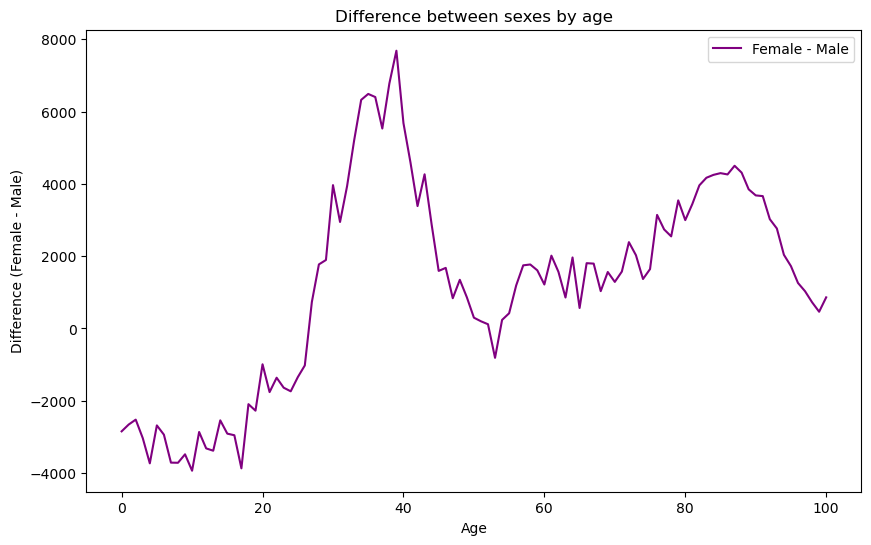

In [24]:
# Plot the difference
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(age_diff.index, age_diff, label='Female - Male', color='purple')
plt.legend()
plt.title('Difference between sexes by age')
plt.xlabel('Age')
plt.ylabel('Difference (Female - Male)')
plt.show()

# Part 2
The program has a variable that stores an age (35 Years old)
And would group the people within 5 years of that age together, into one age group. 
After this will calculate the population difference between the sexes in that age group.

# 2.1 Create a variable

In [25]:
# Create a variable to storage an age.
var_age = 35
print(var_age)

35


# 2.2 Grouping in one group

Grouping within 5 years of that age together.

To group conditions, source: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#combining-multiple-conditional-statements

In [26]:
# Filter the DataFrame for ages within +-5 years of var_age

var_age = 35
age_group = df[(df["Single Year of Age"] >= var_age - 5) &
                  (df["Single Year of Age"] <= var_age + 5)]
# using & for 'and' condition, and parentheses to group conditions
print(age_group)

         Sex  Single Year of Age                Administrative Counties  VALUE
4256    Male                  30                                Ireland  30858
4257    Male                  30                  Carlow County Council    367
4258    Male                  30                    Dublin City Council   6163
4259    Male                  30  Dún Laoghaire Rathdown County Council   1511
4260    Male                  30                  Fingal County Council   1888
...      ...                 ...                                    ...    ...
7867  Female                  40               Roscommon County Council    556
7868  Female                  40                   Sligo County Council    538
7869  Female                  40                   Cavan County Council    630
7870  Female                  40                 Donegal County Council   1293
7871  Female                  40                Monaghan County Council    518

[704 rows x 4 columns]


# 2.3 Get the differences by sex

To calculate the population difference between the sexes in that age group, we can sum the population by sex in the group.

In [33]:
# sum the population in this age group by sex
# grupby method to group data and execute functions on these groups
# source: https://www.w3schools.com/python/pandas/ref_df_groupby.asp
age_group_sum = age_group.groupby("Sex")["VALUE"].sum()
print(age_group_sum)

Sex
Female    829012
Male      768060
Name: VALUE, dtype: int64


In [34]:
# The difference between the sexes in this age group
age_group_diff = age_group_sum[genders[0]] - age_group_sum[genders[1]]
print(f"Difference between {genders[0]} and {genders[1]}: {age_group_diff}")

Difference between Female and Male: 60952


## Part 3
The code would work out which region in Ireland has the biggest population difference between the sexes in that age group.

In [35]:
# Sum the population by sex and region
region_sum = df.groupby(["Administrative Counties", "Sex"])["VALUE"].sum()
print(region_sum)

Administrative Counties   Sex   
Carlow County Council     Female    31146
                          Male      30822
Cavan County Council      Female    40644
                          Male      41060
Clare County Council      Female    65021
                                    ...  
Westmeath County Council  Male      47721
Wexford County Council    Female    83142
                          Male      80777
Wicklow County Council    Female    79287
                          Male      76564
Name: VALUE, Length: 64, dtype: int64


To have a better reading of the data we can use pivot tables.

In [36]:
region_sum = pd.pivot_table(df, index ='Administrative Counties', columns='Sex', values='VALUE', aggfunc='sum') 
#aggfunc='sum' to sum the values
print(region_sum.head(10))

Sex                                    Female    Male
Administrative Counties                              
Carlow County Council                   31146   30822
Cavan County Council                    40644   41060
Clare County Council                    65021   62917
Cork City Council                      114268  109736
Cork County Council                    181043  179109
Donegal County Council                  84289   82795
Dublin City Council                    300917  291796
Dún Laoghaire Rathdown County Council  121828  112032
Fingal County Council                  167974  162532
Galway City Council                     44000   40414


In [37]:
# The differences between sex by regions 
region_diff = region_sum[genders[0]] - region_sum[genders[1]]
print(f"Difference between {genders[0]} and {genders[1]} by regions: {region_diff}")

Difference between Female and Male by regions: Administrative Counties
Carlow County Council                      324
Cavan County Council                      -416
Clare County Council                      2104
Cork City Council                         4532
Cork County Council                       1934
Donegal County Council                    1494
Dublin City Council                       9121
Dún Laoghaire Rathdown County Council     9796
Fingal County Council                     5442
Galway City Council                       3586
Galway County Council                      283
Ireland                                  60041
Kerry County Council                      1684
Kildare County Council                    1246
Kilkenny County Council                    394
Laois County Council                      -679
Leitrim County Council                      93
Limerick City & County Council             632
Longford County Council                   -147
Louth County Council                

In [38]:
# Pivot table to have a better view of the differences
region_diff = pd.pivot_table(df, index ='Administrative Counties', columns='Sex', values='VALUE', aggfunc='sum') 
#aggfunc='sum' to sum the values

region_diff['Difference'] = region_diff[genders[0]] - region_diff[genders[1]]
print(region_diff.head(10))

Sex                                    Female    Male  Difference
Administrative Counties                                          
Carlow County Council                   31146   30822         324
Cavan County Council                    40644   41060        -416
Clare County Council                    65021   62917        2104
Cork City Council                      114268  109736        4532
Cork County Council                    181043  179109        1934
Donegal County Council                  84289   82795        1494
Dublin City Council                    300917  291796        9121
Dún Laoghaire Rathdown County Council  121828  112032        9796
Fingal County Council                  167974  162532        5442
Galway City Council                     44000   40414        3586


# End